# Access CRDB through REST interface

A [REST](https://en.wikipedia.org/wiki/Representational_state_transfer) interface is available at the following URL: http://lpsc.in2p3.fr/crdb/rest.php to query the database.

Click on the tab "REST interface" to see the list of parameters. Minimal required are the parameters `num` and `energy_type`. There are several optional parameters, see the website for details.

A REST query to the database is asking for data. The parameters specify what data to pull and in which format. The query URL has this format:

`url?par1=value1&par2=value2&...&parN=valueN`

where `url` is `http://lpsc.in2p3.fr/crdb/rest.php`, `par1` to `parN` are parameter names and `value1` to `valueN` are parameter values. Name and value pairs are connected by `=`, and individual pairs are linked by `&`.

The `num` parameter is the element, isotope, or particle, whose flux is requested. Valid values are `H`, `He`, `e+` written as `e%2B`, `3H`, and so on. A flux ratio can be requested by also providing the optional `den` parameter, then `num` stands for numerator and `den` for denominator. The other required parameter is `energy_type`. It is used to request the energy unit. Valid values are `EKN`, `EK`, `R`, `ETOT`. See the website for details.

## Using curl

To start queries from a terminal we recommend the program `curl`, which is available for Linux and MacOSX (e.g. via homebrew).

The following command downloads all available boron-to-carbon flux ratios as a function of kinetic energy per nucleon, and save the output in a file called `db.txt`.

In [1]:
!curl -L 'http://lpsc.in2p3.fr/crdb/rest.php?num=B&den=C&energy_type=EKN' > db.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   255  100   255    0     0   3082      0 --:--:-- --:--:-- --:--:--  4396
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   265  100   265    0     0   1496      0 --:--:-- --:--:-- --:--:--  1496
100  107k    0  107k    0     0  30576      0 --:--:--  0:00:03 --:--:-- 47631


In [2]:
# first 25 lines of what we downloaded
!head -25 db.txt

<html><body><p># Data export from CRDB [http://lpsc.in2p3.fr/crdb]
# Please cite Maurin, Melot, Taillet, A&amp;A 569, A32 (2014) [https://ui.adsabs.harvard.edu/abs/2014A%26A...569A..32M]
# Date: 2023/02/21-14:27:58
# Format: USINE code
#   Col.1  -  QUANTITY NAME (case insensitive)
#   Col.2  -  SUB-EXP NAME (case insensitive, no space)
#   Col.3  -  EAXIS TYPE: EKN, EK, R, or ETOT
#   Col.4  -  <e>: mean value bin [GeV/n, GeV, GV, or GeV]
#   Col.5  -  EBIN_LOW
#   Col.6  -  EBIN_HIGH
#   Col.7  -  QUANTITY VALUE: [#/sr/s/m2/EAxis] if flux , no unit if ratio
#   Col.8  -  ERR_STAT-
#   Col.9  -  ERR_STAT+
#   Col.10 -  ERR_SYST-
#   Col.11 -  ERR_SYST+
#   Col.12 -  ADS URL FOR PAPER REF (no space)
#   Col.13 -  phi [MV]
#   Col.14 -  DISTANCE EXP IN SOLAR SYSTEM [AU]
#   Col.15 -  DATIMES: format = yyyy/mm/dd-hhmmss:yyyy/mm/dd-hhmmss;...
#   Col.16 -  IS UPPER LIMIT: format = 0 or 1
#
B/C                                  ACE-CRIS(1997/08-1998/04)                     EKN        7.2000

## Using Python

Using a Python script is convenient if the queried data is directly going to processed further, or if multiple queries are going to be made.

The module [crdb.py](./crdb.py) in this repository contains a complete solution to query the database and convert the output to a `numpy` record array. It requires `numpy` and `cachier` to run, which you can install with `pip install numpy cachier`. The code requires at least Python-3.7.

In [3]:
import crdb

help(crdb.query)

Help on function query in module crdb:

query(num: str, den: str = '', energy_type: str = 'R', combo_level: int = 1, energy_convert_level: int = 1, flux_rescaling: float = 0.0, exp_dates: str = '', energy_start: float = 0.0, energy_stop: float = 0.0, time_start: str = '', time_stop: str = '', time_series: str = '', format: str = '', modulation: str = '', timeout: int = 120, server_url='http://lpsc.in2p3.fr/crdb')
    Query CRDB and return table as a numpy array.
    
    See http://lpsc.in2p3.fr/crdb for documentation which parameters are accepted.
    All string values are case insensitive.
    
    Parameters
    ----------
    num: str
        Element, isotope, particle, or mass group.
    den: str, optional
        Element, isotope, particle, or mass group.
    energy_type: str, optional
        Energy unit for the requested quantity. Default is R.
        Valid values: EKN, EK, R, ETOT, ETOTN.
    combo_level: int, optional
        One of 0, 1, 2. Default is 1. Add combinations (r

In [4]:
# get boron-to-carbon flux ratios measured in kinetic energy per nucleon as a numpy record array
tab = crdb.query(num="B", den="C", energy_type="EKN")

# print column names
for icol, col_name in enumerate(tab.dtype.fields):
    print("%2i" % icol, col_name)

# show mean energies, flux values, and which experiment collected the data of the first 20 entries
tab[["e_mean", "value", "sub_exp"]][:20]

 0 quantity
 1 sub_exp
 2 e_axis
 3 e_mean
 4 e_low
 5 e_high
 6 value
 7 err_stat_minus
 8 err_stat_plus
 9 err_sys_minus
10 err_sys_plus
11 ads_url
12 phi_in_mv
13 distance_in_au
14 datetime
15 is_upper_limit


array([(0.072    , 0.2327684, 'ACE-CRIS(1997/08-1998/04)'),
       (0.085    , 0.2361087, 'ACE-CRIS(1997/08-1998/04)'),
       (0.1      , 0.2390259, 'ACE-CRIS(1997/08-1998/04)'),
       (0.12     , 0.2274313, 'ACE-CRIS(1997/08-1998/04)'),
       (0.142    , 0.2439506, 'ACE-CRIS(1997/08-1998/04)'),
       (0.17     , 0.246988 , 'ACE-CRIS(1997/08-1998/04)'),
       (0.0774597, 0.2407   , 'ACE-CRIS(1998/01-1999/01)'),
       (0.09998  , 0.2473   , 'ACE-CRIS(1998/01-1999/01)'),
       (0.117473 , 0.2489   , 'ACE-CRIS(1998/01-1999/01)'),
       (0.134977 , 0.2571   , 'ACE-CRIS(1998/01-1999/01)'),
       (0.150987 , 0.2555   , 'ACE-CRIS(1998/01-1999/01)'),
       (0.162481 , 0.2654   , 'ACE-CRIS(1998/01-1999/01)'),
       (0.1759972, 0.256975 , 'ACE-CRIS(1998/01-1999/01)'),
       (0.072    , 0.2977974, 'ACE-CRIS(2001/05-2003/09)'),
       (0.085    , 0.2967894, 'ACE-CRIS(2001/05-2003/09)'),
       (0.1      , 0.2961165, 'ACE-CRIS(2001/05-2003/09)'),
       (0.12     , 0.2963856, 'ACE-CRIS(

Let's list all the experiments which contributed this data.  

In [5]:
import numpy as np

for exp in np.unique(tab["sub_exp"]):
    print(exp)

ACE-CRIS(1997/08-1998/04)
ACE-CRIS(1998/01-1999/01)
ACE-CRIS(2001/05-2003/09)
ACE-CRIS(2009/03-2010/01)
AMS01(1998/06)
AMS02(2011/05-2016/05)
ATIC02(2003/01)
Balloon(1965/06)
Balloon(1970/07)
Balloon(1971/09+1972/10)
Balloon(1972/10)
Balloon(1973/08)
Balloon(1973/09+1974/05+1975/09+1975/10)
Balloon(1974/07+1974/08+1976/09)
Balloon(1976/09)
Balloon(1976/10)
Balloon(1977/09)
Balloon(1981/09)
Balloon(1991/09)
Balloon(64/03-65/7)
Balloon(66/07+67/05-06-07)
CALET(2015/10-2022/02)
CREAM-I(2004/12-2005/01)
CRN-Spacelab2(1985/07-1985/08)
DAMPE(2016/01-2021/12)
Gemini11(1966/08)
HEAO3-C2(1979/10-1980/06)
IMP5(1969/06-1970/06)
IMP7(1973/05-1973/12)
IMP8(1974/01-1978/10)
ISEE3-HKH(1978/08-1981/04)
OGO1(1965/03-1965/06)
PAMELA(2006/07-2008/03)
TRACER06(2006/07)
Ulysses-HET(1990/10-1995/07)
Voyager1&2(1977/01-1993/12)
Voyager1&2(1977/01-1996/12)
Voyager1&2(1977/01-1998/12)
Voyager1-HET-Aend(2012/12-2015/06)
Voyager1-HET-Bend(2012/12-2014/12)
Voyager1-LET(2012/12-2015/06)
Voyager2-HET(1986/01-1987/1

The data in parantheses is the data taking campain. We strip that information and generate masks which select all data points from a particular experiment.

In [6]:
experiments = {}
for this_sub_exp in np.unique(tab["sub_exp"]):
    exp = this_sub_exp[:this_sub_exp.find("(")]
    mask = tab["sub_exp"] == this_sub_exp
    exp_mask = experiments.get(exp, False)
    exp_mask |= mask
    experiments[exp] = exp_mask

for exp, mask in experiments.items():
    print(exp, np.sum(mask), "entries")

ACE-CRIS 25 entries
AMS01 10 entries
AMS02 67 entries
ATIC02 5 entries
Balloon 114 entries
CALET 20 entries
CREAM-I 6 entries
CRN-Spacelab2 3 entries
DAMPE 13 entries
Gemini11 1 entries
HEAO3-C2 14 entries
IMP5 2 entries
IMP7 3 entries
IMP8 7 entries
ISEE3-HKH 7 entries
OGO1 1 entries
PAMELA 18 entries
TRACER06 6 entries
Ulysses-HET 2 entries
Voyager1&2 4 entries
Voyager1-HET-Aend 5 entries
Voyager1-HET-Bend 3 entries
Voyager1-LET 1 entries
Voyager2-HET 1 entries


This grouping code is quite useful, so there is a function `crdb.experiment_masks` in the `crdb` package which computes them.

Let's plot the B/C ratios of these experiments with matplotlib.

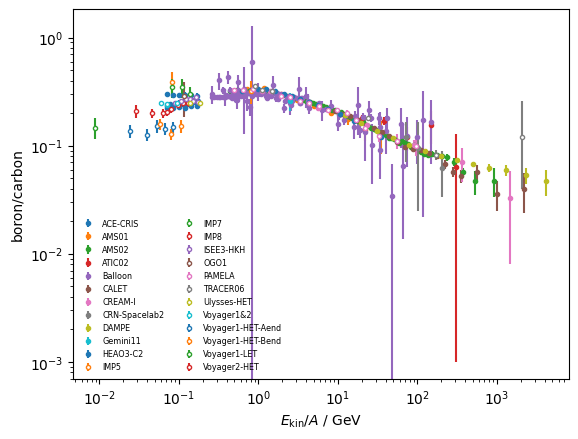

In [7]:
from matplotlib import pyplot as plt

# plot each experiment with different color
for i, (exp, mask) in enumerate(crdb.experiment_masks(tab).items()):
    t = tab[mask]
    sta = np.row_stack([np.abs(t["err_stat_minus"]), t["err_stat_plus"]])
    color = f"C{i}"
    mfc = "w" if i > 10 else color
    plt.errorbar(t["e_mean"], t["value"], sta, fmt=".",
                 mfc=mfc, mec=color, ecolor=color, label=exp)

plt.legend(ncol=2, frameon=False, fontsize="xx-small")
plt.xlabel("$E_\\mathrm{kin} / A$ / GeV")
plt.ylabel("boron/carbon")
plt.loglog();

`crdb.query` caches the server response for 30 days. Running the same query repeatedly during development is convenient. It will be slow only the first time. The second time will be fast.

For example, if we want to plot the fluxes of several elements vs. rigidity scaled with R^2, we would run this code:

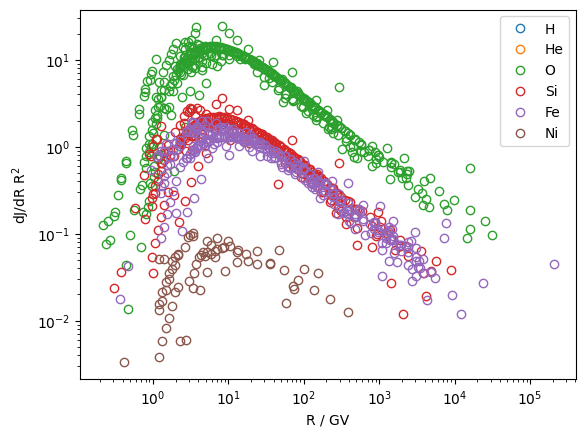

In [8]:
for ielem, elem in enumerate(("H", "He", "O", "Si", "Fe", "Ni")):
    tab2 = crdb.query(elem, energy_type="R", flux_rescaling=2, energy_convert_level=2)
    plt.plot(tab2["e_mean"], tab2["value"], "o", color="none", mec=f"C{ielem}", label=elem)
plt.xlabel("R / GV")
plt.ylabel("dJ/dR R$^2$")
plt.legend()
plt.loglog();

The queries will take some time if this code runs for the first time.

If we decide that another style would prettier, we can just modify the plotting code and keep the rest the same. Running this will be fast now.

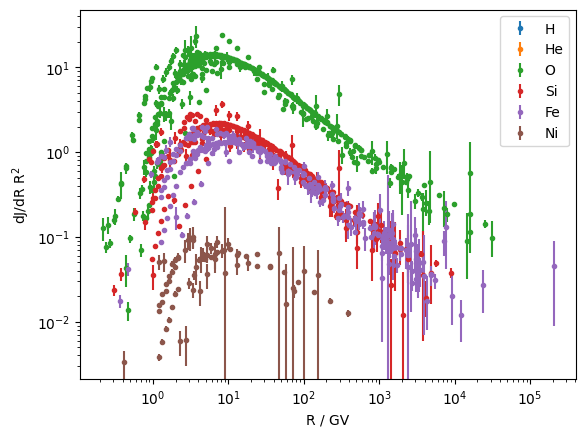

In [9]:
# plot fluxes of several elements vs rigidity scaled with R^2
for ielem, elem in enumerate(("H", "He", "O", "Si", "Fe", "Ni")):
    tab2 = crdb.query(elem, energy_type="R", flux_rescaling=2, energy_convert_level=2)
    sta = np.row_stack([np.abs(tab2["err_stat_minus"]), tab2["err_stat_plus"]])
    plt.errorbar(tab2["e_mean"], tab2["value"], sta,
                 fmt=".", color=f"C{ielem}", label=elem)
plt.xlabel("R / GV")
plt.ylabel("dJ/dR R$^2$")
plt.legend()
plt.loglog();

If you every need to clear the cache, run `crdb.clear_cache()`.